In [69]:
%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Introduction

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters.

Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

On the flip side, although naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.

# Data Preprocessing (Feature Scaling)

Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of Principle Component Analysis (PCA) as being a prime example of when normalization is important. In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.

To illustrate this, PCA is performed comparing the use of data with StandardScaler applied, to unscaled data. The results are visualized and a clear difference noted. The 1st principal component in the unscaled set can be seen. It can be seen that feature #13 dominates the direction, being a whole two orders of magnitude above the other features. This is contrasted when observing the principal component for the scaled version of the data. In the scaled version, the orders of magnitude are roughly the same across all the features.

The dataset used is the Wine Dataset available at UCI. This dataset has continuous features that are heterogeneous in scale due to differing properties that they measure (i.e. alcohol content and malic acid).

The transformed data is then used to train a naive Bayes classifier, and a clear difference in prediction accuracies is observed wherein the dataset which is scaled before PCA vastly outperforms the unscaled version.

In [6]:
# let us load a new and interesting dataset

features, target = load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42)

In [7]:
# Let us fit a Naive Bayes classifier using two components chosen by PCA 
# we use an ML pipeline to chain together these ML functions

unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

In [9]:
pca = unscaled_clf.named_steps["pca"]

X_train_transformed = pca.transform(X_train)

Text(0.5, 1.0, 'No pre-processing')

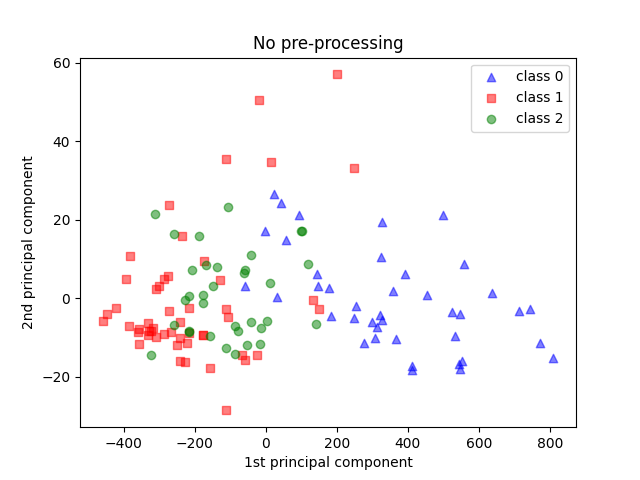

In [16]:
plt.close('all')
fig, ax = plt.subplots()

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )
    

ax.set_xlabel("1st principal component")
ax.set_ylabel("2nd principal component")
ax.legend(loc="upper right")
ax.set_title("No pre-processing")

In [8]:
print(f"{accuracy_score(y_test, pred_test):.2%}\n")

81.48%



In [17]:
# Here we do the same thing but first scale all values
# by removing the mean and scaling to unit variance.

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

In [18]:
pca_std = std_clf.named_steps["pca"]

scaler = std_clf.named_steps["standardscaler"]
scaled_X_train = scaler.transform(X_train)

X_train_std_transformed = pca_std.transform(scaled_X_train)

Text(0.5, 1.0, 'With feature scaling')

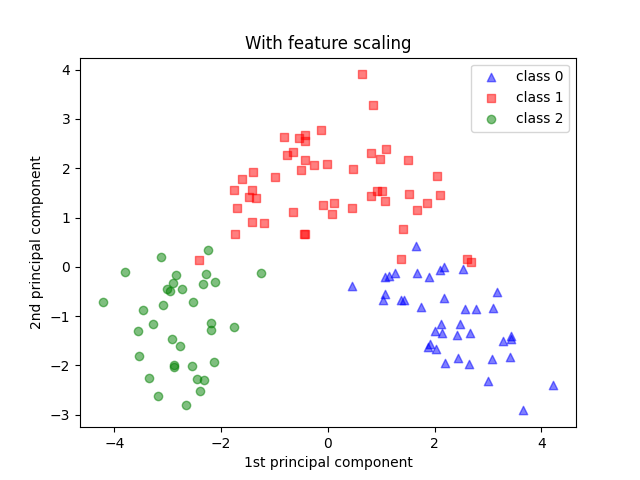

In [21]:
plt.close('all')
fig, ax = plt.subplots()

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )
    

ax.set_xlabel("1st principal component")
ax.set_ylabel("2nd principal component")
ax.legend(loc="upper right")
ax.set_title("With feature scaling")

In [23]:
print(f"{accuracy_score(y_test, pred_test_std):.2%}\n")

98.15%



# Comparing ML approaches

Take the time to compare the approaches you've learned and reason why the results are what they are, and recall what the advantages are of each respective model. See if you can hit the upper limit of each model in terms of accuracy (without overfitting).

In [109]:
# let us create three synthetic datasets

h = 0.02  # step size in the mesh

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

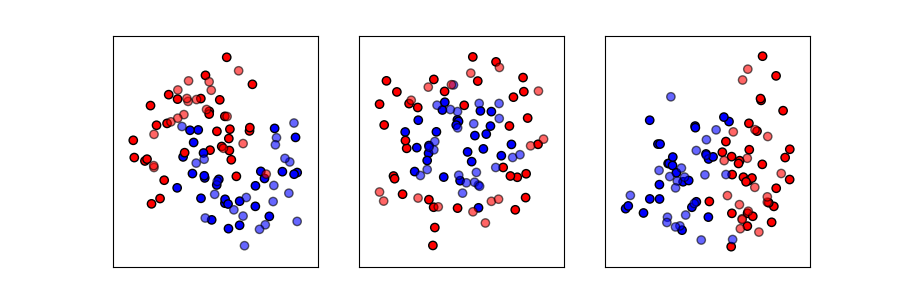

In [110]:
plt.close('all')

figure = plt.figure(figsize=(9, 3))

i = 1
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1, 3, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

plt.show()

In [96]:
# let us create a helper function which takes a classifier, a 'title', and a dataset
# and plots the decision boundaries

def plot_model(clf, name, datasets):

    plt.close('all')
    figure = plt.figure(figsize=(9, 3))
    i = 1
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.4, random_state=42
        )

        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(["#FF0000", "#0000FF"])
        ax = plt.subplot(1, 3, i)
        i += 1
        
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)       

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )

In [75]:
# let us generate each of the ML algorithms that we have learned

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "Naive Bayes"
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB()
]

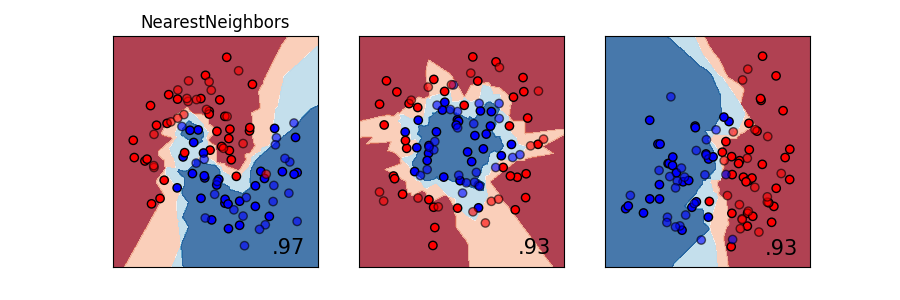

In [111]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

plot_model(KNeighborsClassifier(3), "NearestNeighbors", datasets)

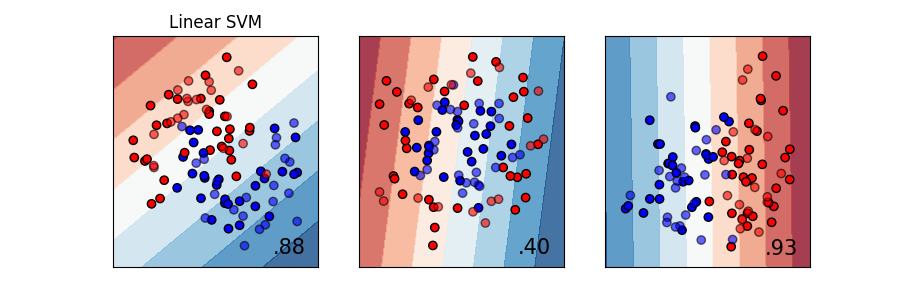

In [98]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

plot_model(SVC(kernel="linear", C=0.025), "Linear SVM", datasets)

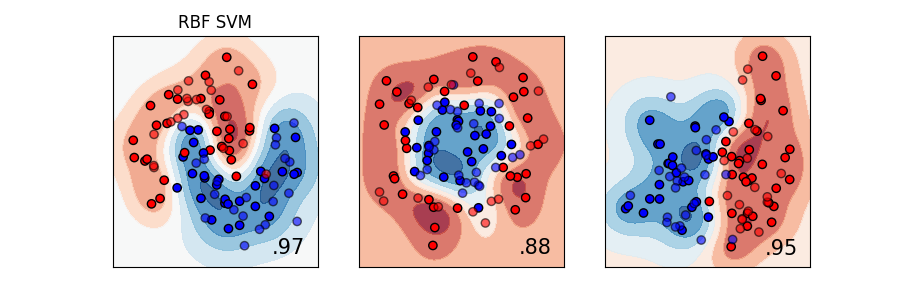

In [100]:
plot_model(SVC(gamma=2, C=1), "RBF SVM", datasets)

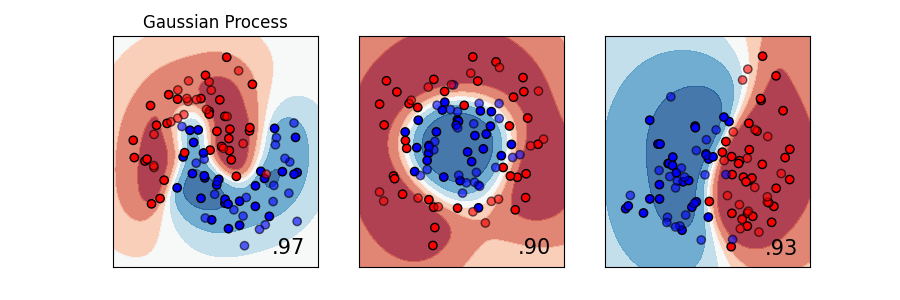

In [101]:
plot_model(GaussianProcessClassifier(1.0 * RBF(1.0)), "Gaussian Process", datasets)

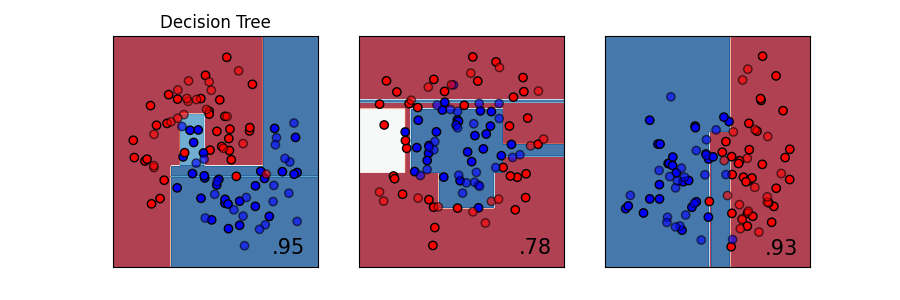

In [102]:
plot_model(DecisionTreeClassifier(max_depth=5), "Decision Tree", datasets)

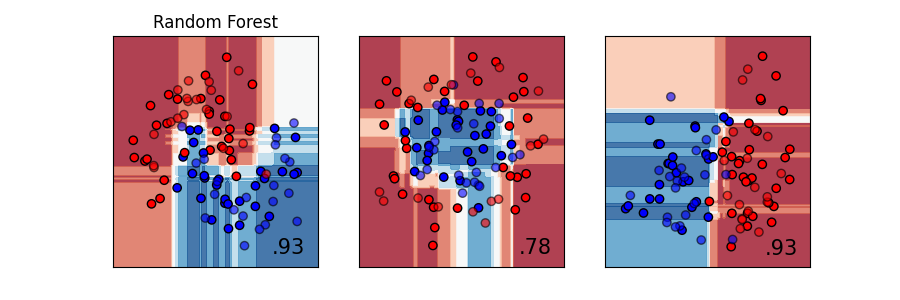

In [103]:
plot_model(RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), "Random Forest", datasets)

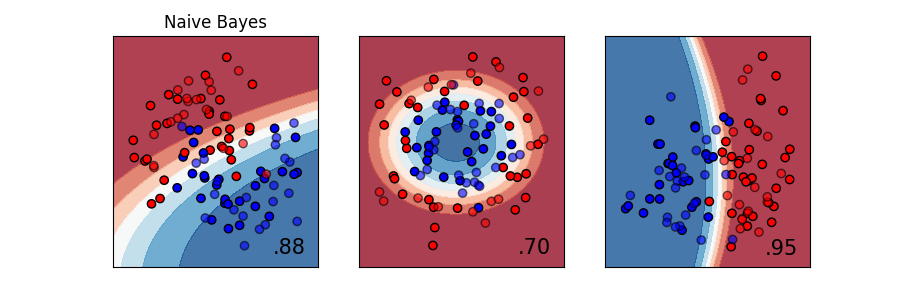

In [104]:
plot_model(GaussianNB(), "Naive Bayes", datasets)

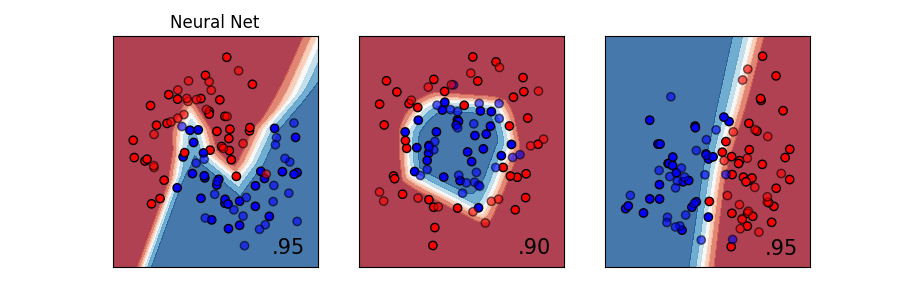

In [182]:
plot_model(MLPClassifier((64), activation='relu', solver='adam', max_iter=2000), "Neural Net", datasets)